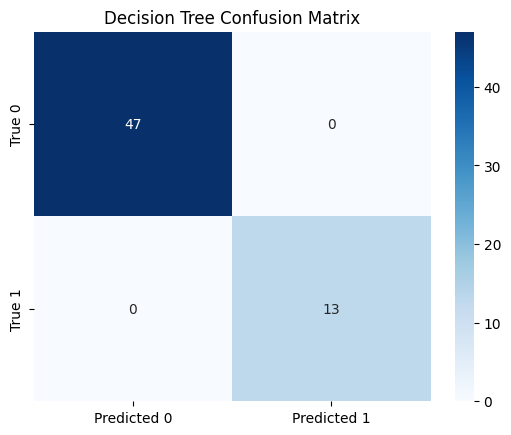

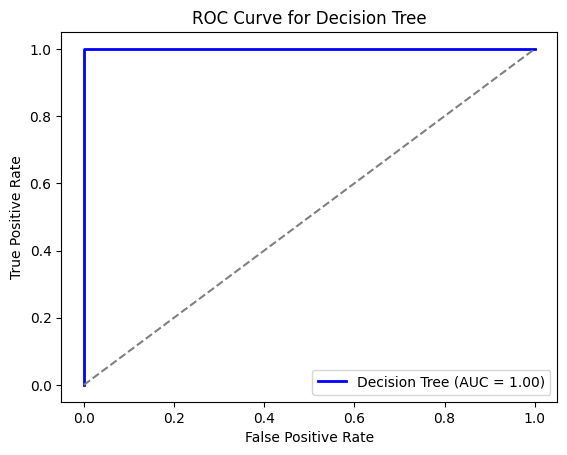

Decision Tree Accuracy: 1.0
Decision Tree F1 Score: 1.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your path or dataset loading)
import pandas as pd
data = pd.read_csv(r"C:\Users\DELL\Downloads\customer_data.csv")

# Prepare features (X) and target (y)
X = data[['Age', 'Income', 'SpendingScore']]
y = data['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit model to training data
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")


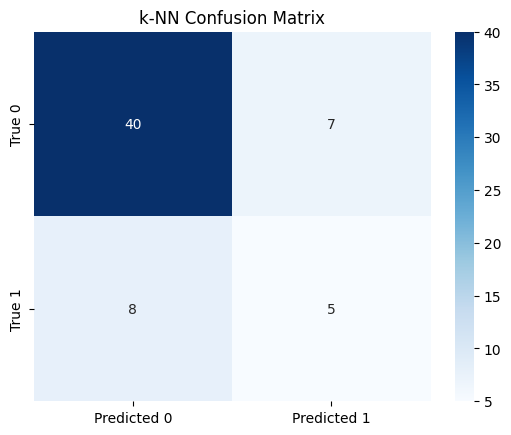

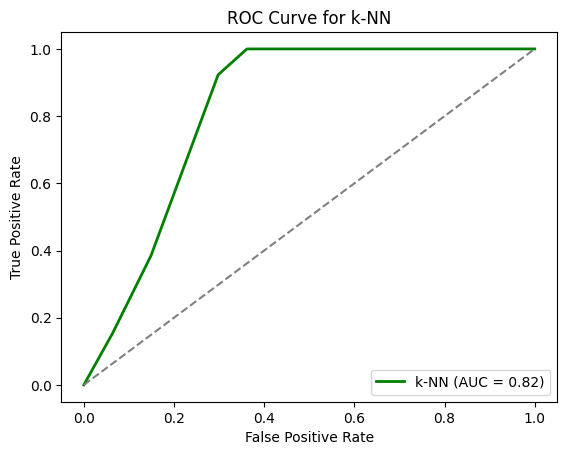

k-NN Accuracy: 0.75
k-NN F1 Score: 0.4


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit model to training data
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("k-NN Confusion Matrix")
plt.show()

# ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='k-NN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-NN')
plt.legend(loc="lower right")
plt.show()

print(f"k-NN Accuracy: {accuracy_knn}")
print(f"k-NN F1 Score: {f1_knn}")


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best model from grid search
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)

print(f"Best Decision Tree Accuracy: {accuracy_best_dt}")
print(f"Best Decision Tree F1 Score: {f1_best_dt}")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Accuracy: 1.0
Best Decision Tree F1 Score: 1.0


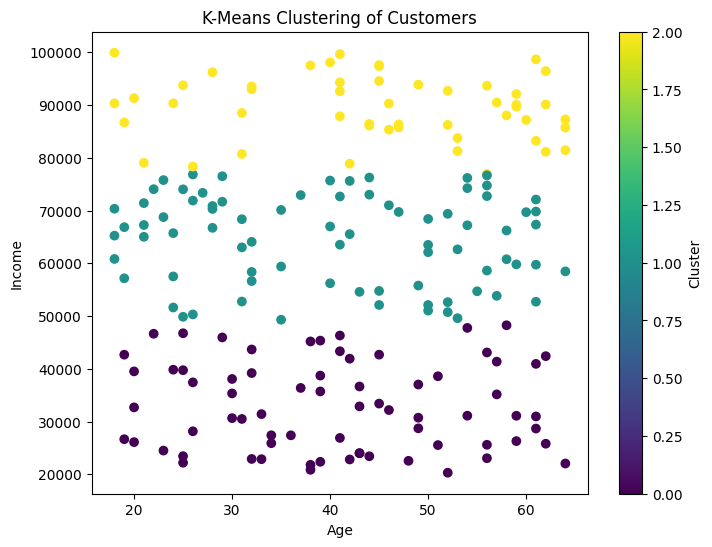

In [17]:
from sklearn.cluster import KMeans

# Initialize K-Means model with 3 clusters (you can change the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the dataset
data['Cluster'] = labels

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(label='Cluster')
plt.show()


In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset
data = pd.read_csv(r"C:\Users\DELL\Downloads\customer_data.csv")

# Discretize (bin) the continuous features into categorical values
# Using KBinsDiscretizer to create 4 bins (adjust the number of bins as needed)
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

# Binning 'Age', 'Income', and 'SpendingScore'
data[['Age_binned', 'Income_binned', 'SpendingScore_binned']] = kbins.fit_transform(data[['Age', 'Income', 'SpendingScore']])

# Now convert the binned columns into categorical features (binary 0/1)
# Convert each binned column into binary (0, 1) by creating a new one-hot encoding for each bin
data_encoded = pd.get_dummies(data[['Age_binned', 'Income_binned', 'SpendingScore_binned']], drop_first=False)

# Ensure the binary values (0 or 1) are the only present values for Apriori
data_encoded = data_encoded.astype(bool).astype(int)  # Convert to boolean and then to 0, 1

# Display the first few rows of the encoded data to verify transformation
print(data_encoded.head())

# Apply the Apriori algorithm with a lower min_support
frequent_itemsets = apriori(data_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Display the rules
print(rules)


   Age_binned  Income_binned  SpendingScore_binned
0           1              1                     1
1           1              1                     1
2           1              1                     0
3           1              1                     0
4           0              1                     0
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
